This notebook attempts to predict volatility values with multiple linear regression using the presence of social media spikes and historical stock data. 

Methods: 
-Naive, whole dataset linear regression
-Temporal test/train + lag features
-Dynamic temporal test/training +lags

Results:
-Linear regression performs poorly at predicting daily volatility 
-Linear regression can create some surprisingly robust models for preducting week/biweek after volatility. This is not surprising since our data consists of rolling averages/deviations. Learning a new day only adds a small pertubation on the existing data, making the predictions very stable. 
-In EVERY model, there is little effect from the presence of social media spikes. We explore this in Part II. 

In [2]:
#Packages for notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Spike dataframe vs no spike dataframe
spike_data = pd.read_csv('daily_spike_vs_none_1.5sigma_all.csv')

Intercept: 0.0013991044989703203
Spike: -0.0013
AbnormalVolatility_daily: -0.0421
ExpectedDailyVariance: 0.0357
SP500_expected_volatility: -0.0074
R^2: 0.0020890950083296556


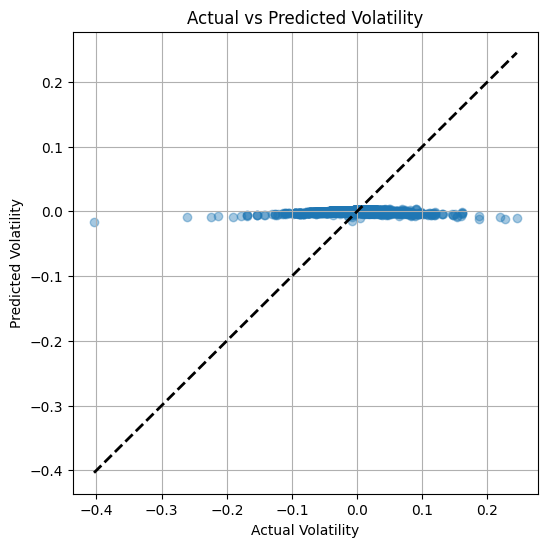

In [3]:
#A very basic linear regression model fitting example for daily spike and day-after volatility
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_cols = ['Spike', 'AbnormalVolatility_daily','ExpectedDailyVariance', 'SP500_expected_volatility']
# Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['Spike'])

X = clean_df[X_cols]
y = clean_df['actual_volatility'] 


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))

# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.title('Actual vs Predicted Volatility')
plt.grid(True)
plt.show()


Intercept: 0.15027121847585173
Spike: 0.0000
ExpectedDailyVariance: -0.0233
weekly_SP500_expected_volatility: 0.2999
expected_weekly_volatility: 0.5925
SP500_expected_volatility: 0.0093
R^2: 0.2694668793247704


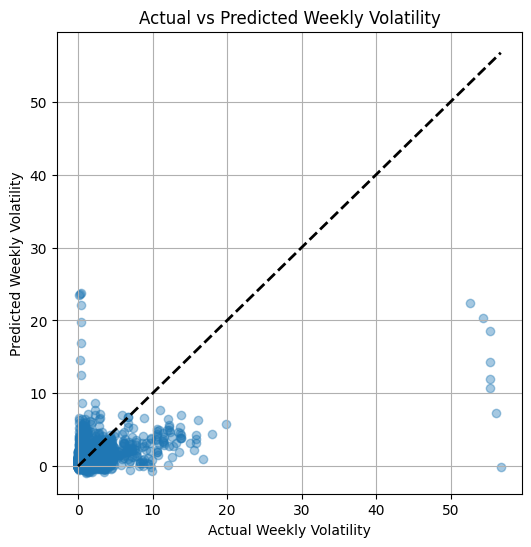

In [4]:
#Repeat for daily spike vs week after volatility
X_cols = ['Spike', 'ExpectedDailyVariance', 'weekly_SP500_expected_volatility', 'expected_weekly_volatility', 'SP500_expected_volatility']
#Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_weekly_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')
#Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_weekly_volatility'])


X = clean_df[X_cols]*1000
y = clean_df['actual_weekly_volatility'] *1000
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))
# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Weekly Volatility')
plt.ylabel('Predicted Weekly Volatility')
plt.title('Actual vs Predicted Weekly Volatility')
plt.grid(True)
plt.show()

Intercept: 8.258874190282675e-05
Spike: 0.0001
ExpectedDailyVariance: -0.0070
weekly_SP500_expected_volatility: 0.2004
biweekly_SP500_expected_volatility: -0.1543
expected_biweekly_volatility: -0.0277
expected_weekly_volatility: 0.8375
SP500_expected_volatility: 0.0019
R^2: 0.8063014710307148


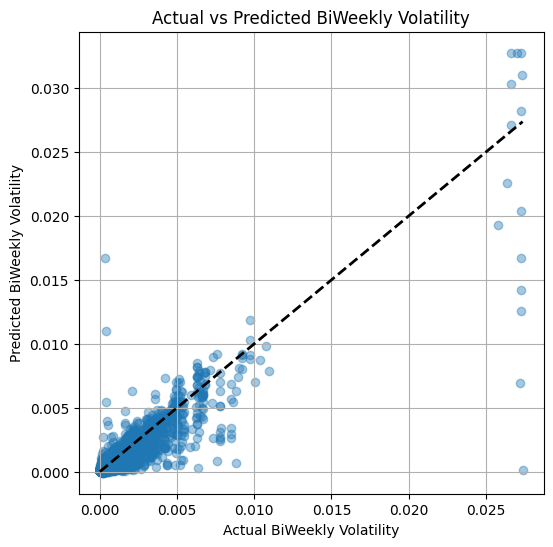

In [5]:
#repeat for daily spike vs biweek after volatility
X_cols = ['Spike', 'ExpectedDailyVariance', 'weekly_SP500_expected_volatility','biweekly_SP500_expected_volatility', 'expected_biweekly_volatility', 'expected_weekly_volatility', 'SP500_expected_volatility']
#Convert columns to numeric types (will turn any non-numeric into NaN)
for col in X_cols + ['actual_biweekly_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')
#Drop rows with any NaN in features or target (do this before fitting!)
clean_df = spike_data.dropna(subset=X_cols + ['actual_biweekly_volatility'])

X = clean_df[X_cols]
y = clean_df['actual_biweekly_volatility']
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Intercept:", model.intercept_)
for feature, coef in zip(X_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print("R^2:", model.score(X, y))
# Plot predicted vs. actual
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual BiWeekly Volatility')
plt.ylabel('Predicted BiWeekly Volatility')
plt.title('Actual vs Predicted BiWeekly Volatility')
plt.grid(True)
plt.show()

Below we introduce train/test splits and temporal lags to create a more robust model. 

Test RMSE: 0.02287904280980963
Spike_lag_1: -0.0011
Spike_lag_2: -0.0005
Spike_lag_3: 0.0003
Spike_lag_4: 0.0014
Spike_lag_5: -0.0002
Spike_lag_6: -0.0013
Spike_lag_7: 0.0009
Volatility_lag_1: 0.2008
Volatility_lag_2: -0.0306
Volatility_lag_3: -0.0356
Volatility_lag_4: 0.0236
Volatility_lag_5: 0.0189
Volatility_lag_6: 0.0119
Volatility_lag_7: -0.0165
MarketVolatility_lag_1: 0.0611
MarketVolatility_lag_2: 0.0386
MarketVolatility_lag_3: -0.0004
MarketVolatility_lag_4: 0.0878
MarketVolatility_lag_5: -0.1232
MarketVolatility_lag_6: 0.0025
MarketVolatility_lag_7: 0.0566
Test R²: -0.0031


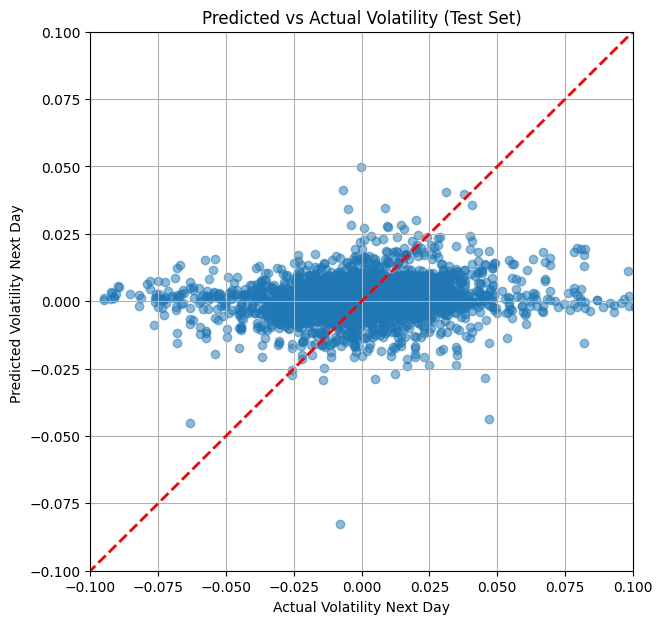

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set max number of lags to include
max_lag = 7

# Create lagged features grouped by Ticker
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'Volatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
    spike_data[f'MarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)

# Create target variable: future volatility (day after)
spike_data['Volatility_next'] = spike_data.groupby('Ticker')['actual_volatility'].shift(-1)

# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'Volatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'MarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]

spike_data_model = spike_data.dropna(subset=features + ['Volatility_next'])

X = spike_data_model[features]
y = spike_data_model['Volatility_next']

# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Volatility Next Day')
plt.ylabel('Predicted Volatility Next Day ')
plt.title('Predicted vs Actual Volatility (Test Set)')
plt.grid(True)

plt.xlim(-.1, .1)
# Set y-axis limits - zoom on predicted values between -0.1 and 0.1
plt.ylim(-.1, .1)

plt.show()

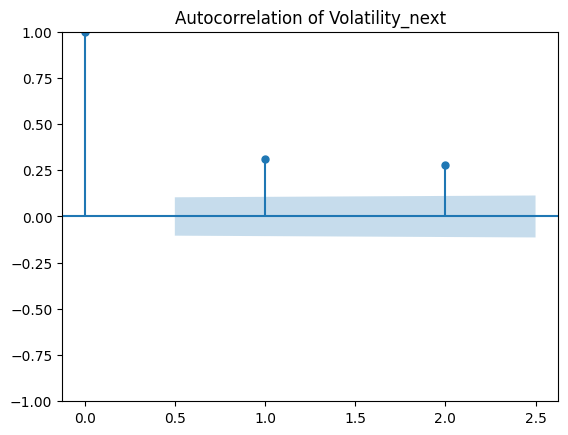

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

selected_ticker = spike_data_model[spike_data_model['Ticker'] == spike_data_model['Ticker'].unique()[0]]
plot_acf(selected_ticker['Volatility_next'], lags=2)
plt.title("Autocorrelation of Volatility_next")
plt.show()


The fit is again poor for daily volatility, with some autocorrelation present. 

C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\291347386.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spike_data[f'DailyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\291347386.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spike_data[f'WeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(lag)
C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\291347386.py:8: PerformanceWarning: DataFram

Test R²: 0.5878
Test RMSE: 0.0015437828801934267
Spike_lag_1: 0.0000
Spike_lag_2: 0.0000
Spike_lag_3: 0.0000
Spike_lag_4: -0.0000
Spike_lag_5: 0.0000
Spike_lag_6: 0.0000
Spike_lag_7: 0.0000
Spike_lag_8: -0.0000
Spike_lag_9: -0.0000
Spike_lag_10: -0.0000
Spike_lag_11: 0.0000
Spike_lag_12: 0.0000
Spike_lag_13: 0.0000
Spike_lag_14: -0.0000
Spike_lag_15: 0.0000
WeeklyVolatility_lag_1: 0.8690
WeeklyVolatility_lag_2: 0.0150
WeeklyVolatility_lag_3: -0.0098
WeeklyVolatility_lag_4: 0.0064
WeeklyVolatility_lag_5: -0.0372
WeeklyVolatility_lag_6: -0.4320
WeeklyVolatility_lag_7: 0.0324
WeeklyVolatility_lag_8: 0.3394
WeeklyVolatility_lag_9: 0.0248
WeeklyVolatility_lag_10: -0.0127
WeeklyVolatility_lag_11: 0.0084
WeeklyVolatility_lag_12: 0.0015
WeeklyVolatility_lag_13: -0.1423
WeeklyVolatility_lag_14: -0.0401
WeeklyVolatility_lag_15: 0.1505
WeeklyMarketVolatility_lag_1: -0.3284
WeeklyMarketVolatility_lag_2: 0.1519
WeeklyMarketVolatility_lag_3: -0.0030
WeeklyMarketVolatility_lag_4: 0.0973
WeeklyMarketV

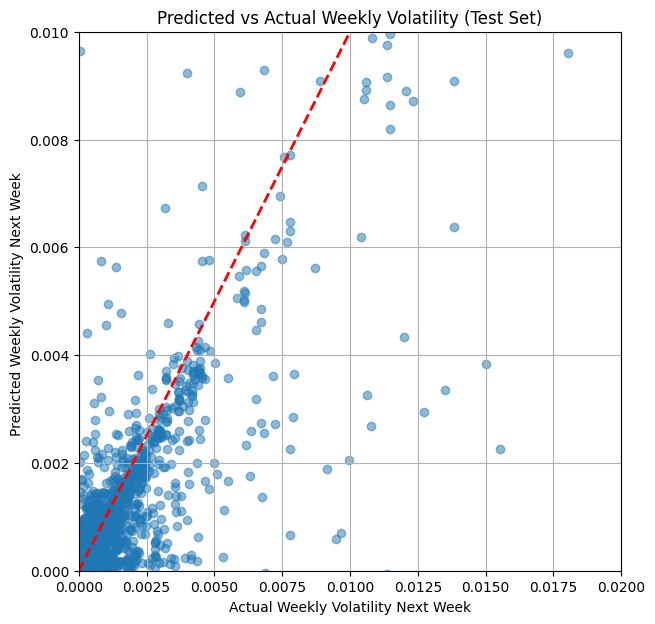

In [8]:
#repeat for daily spike vs week after volatility
# Create lagged features grouped by Ticker
max_lag = 15
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'DailyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
    spike_data[f'WeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(lag)
    spike_data[f'WeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['weekly_SP500_actual_volatility'].shift(lag)
    spike_data[f'DailyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)
# Create target variable: future weekly volatility (week after)
spike_data['WeeklyVolatility_next'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(-1)
# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'WeeklyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'WeeklyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
            [f'DailyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
             [f'DailyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]
spike_data_model = spike_data.dropna(subset=features + ['WeeklyVolatility_next'])
X = spike_data_model[features]
y = spike_data_model['WeeklyVolatility_next']
# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)
r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Volatility Next Week')
plt.ylabel('Predicted Weekly Volatility Next Week ')
plt.title('Predicted vs Actual Weekly Volatility (Test Set)')
plt.grid(True)
plt.xlim(0, .02)
plt.ylim(0, .01)
plt.show()


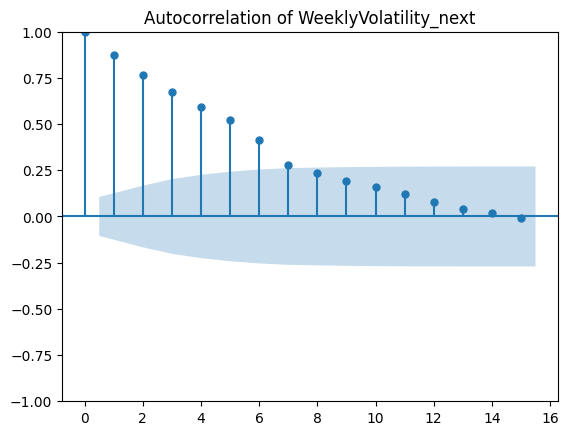

In [9]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

selected_ticker = spike_data_model[spike_data_model['Ticker'] == spike_data_model['Ticker'].unique()[0]]
plot_acf(selected_ticker['WeeklyVolatility_next'], lags=15)
plt.title("Autocorrelation of WeeklyVolatility_next")
plt.show()

Weekly data is actually predicted fairly well, and there is a (not unexpected) amount of autocorrelation between lags. It makes sense that we can predict weekly volatility well as these are rolling averages, and learning a new data point is merely adding a small pertubation to an existing calculation. In a financial context, a .58 R^2 value is rather good. However, it shows little to no signal from the presence of social media spikes. 

C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\3018845020.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spike_data[f'BiWeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_biweekly_volatility'].shift(lag)
C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\3018845020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spike_data[f'BiWeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['biweekly_SP500_actual_volatility'].shift(lag)
C:\Users\Thisu\AppData\Local\Temp\ipykernel_21188\3018845020.py:

Test R²: 0.8383
Test RMSE: 0.6736653826857613
Spike_lag_1: 0.0000
Spike_lag_2: 0.0000
Spike_lag_3: 0.0000
Spike_lag_4: -0.0000
Spike_lag_5: 0.0000
Spike_lag_6: 0.0000
Spike_lag_7: 0.0000
Spike_lag_8: 0.0000
Spike_lag_9: -0.0000
Spike_lag_10: 0.0000
Spike_lag_11: 0.0000
Spike_lag_12: 0.0000
Spike_lag_13: 0.0000
Spike_lag_14: -0.0000
Spike_lag_15: 0.0000
BiWeeklyVolatility_lag_1: 0.5896
BiWeeklyVolatility_lag_2: 0.0685
BiWeeklyVolatility_lag_3: 0.0105
BiWeeklyVolatility_lag_4: -0.0206
BiWeeklyVolatility_lag_5: 0.0174
BiWeeklyVolatility_lag_6: -0.1337
BiWeeklyVolatility_lag_7: -0.0564
BiWeeklyVolatility_lag_8: 0.1882
BiWeeklyVolatility_lag_9: 0.0486
BiWeeklyVolatility_lag_10: 0.0199
BiWeeklyVolatility_lag_11: 0.0046
BiWeeklyVolatility_lag_12: 0.0049
BiWeeklyVolatility_lag_13: -0.1439
BiWeeklyVolatility_lag_14: -0.1255
BiWeeklyVolatility_lag_15: 0.2302
BiWeeklyMarketVolatility_lag_1: -0.0440
BiWeeklyMarketVolatility_lag_2: -0.0921
BiWeeklyMarketVolatility_lag_3: -0.1758
BiWeeklyMarketVolat

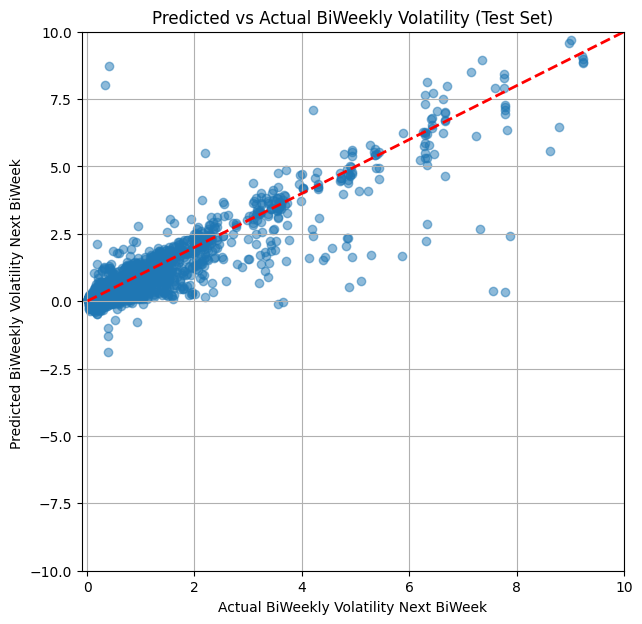

In [10]:
#Repeat for daily spike vs biweek after volatility
# Create lagged features grouped by Ticker
max_lag = 15
for lag in range(1, max_lag + 1):
    spike_data[f'Spike_lag_{lag}'] = spike_data.groupby('Ticker')['Spike'].shift(lag)
    spike_data[f'BiWeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_biweekly_volatility'].shift(lag)
    spike_data[f'BiWeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['biweekly_SP500_actual_volatility'].shift(lag)
    spike_data[f'DailyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_volatility'].shift(lag)
    spike_data[f'WeeklyVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['actual_weekly_volatility'].shift(lag)
    spike_data[f'WeeklyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['weekly_SP500_actual_volatility'].shift(lag)
    spike_data[f'DailyMarketVolatility_lag_{lag}'] = spike_data.groupby('Ticker')['SP500_actual_volatility'].shift(lag)
# Create target variable: future biweekly volatility (biweek after)
spike_data['BiWeeklyVolatility_next'] = spike_data.groupby('Ticker')['actual_biweekly_volatility'].shift(-1)
# Drop rows with any missing values for these lagged features or target
features = [f'Spike_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'BiWeeklyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'BiWeeklyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
            [f'WeeklyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
           [f'WeeklyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
            [f'DailyMarketVolatility_lag_{lag}' for lag in range(1, max_lag + 1)] + \
            [f'DailyVolatility_lag_{lag}' for lag in range(1, max_lag + 1)]
spike_data_model = spike_data.dropna(subset=features + ['BiWeeklyVolatility_next'])
X = spike_data_model[features]*1000
y = spike_data_model['BiWeeklyVolatility_next']*1000
# Train-test split (chronological)
split_date = '2025-04-01'
train_mask = spike_data_model['Date'] < split_date
test_mask = spike_data_model['Date'] >= split_date
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)
r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")
print("Test RMSE:", rmse)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BiWeekly Volatility Next BiWeek')
plt.ylabel('Predicted BiWeekly Volatility Next BiWeek ')
plt.title('Predicted vs Actual BiWeekly Volatility (Test Set)')
plt.grid(True)
plt.xlim(-.1, 10)
plt.ylim(-10, 10)
plt.show()


We get an even better model for biweekly volatility. Again, there is little signal from the presence of spikes, and historical data gives the most information. 

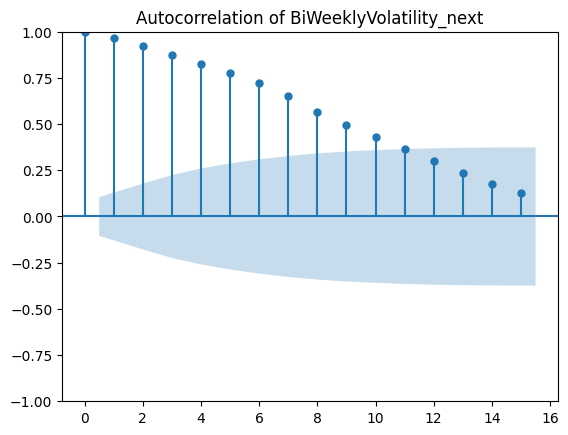

In [11]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

selected_ticker = spike_data_model[spike_data_model['Ticker'] == spike_data_model['Ticker'].unique()[0]]
plot_acf(selected_ticker['BiWeeklyVolatility_next'], lags=15)
plt.title("Autocorrelation of BiWeeklyVolatility_next")
plt.show()

Feature: Spike, Coefficient: -0.0007
Feature: ExpectedDailyVariance, Coefficient: 0.0350
Feature: SP500_actual_volatility, Coefficient: 0.8094
Feature: SP500_expected_volatility, Coefficient: 0.0584
Test R²: 0.0324


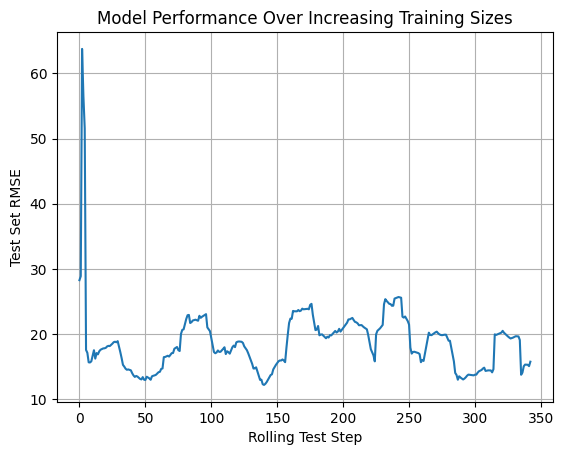

In [12]:
#Dynamic train-test split with increasing training size
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


all_y_test = []
all_y_pred = []
all_test_dates = []



X_cols = ['Spike', 'ExpectedDailyVariance','SP500_actual_volatility', 'SP500_expected_volatility']

# Convert columns to numeric (convert errors to NaN)
for col in X_cols + ['actual_volatility']:
    spike_data[col] = pd.to_numeric(spike_data[col], errors='coerce')

# Drop rows with NA in features or target
clean_df = spike_data.dropna(subset=X_cols + ['actual_volatility']).copy()

# Scale features and target by 1000
clean_df[X_cols] = clean_df[X_cols] * 1000
clean_df['actual_volatility_scaled'] = clean_df['actual_volatility'] * 1000

# Sort by Date to ensure chronological order for time-series splitting
clean_df = clean_df.sort_values('Date')

unique_dates = clean_df['Date'].unique()
test_size = 20 # number of days to include in each test set (adjust as needed)

rmse_scores = []

for start_test_idx in range(1, len(unique_dates) - test_size):


    train_dates = unique_dates[:start_test_idx]
    test_dates = unique_dates[start_test_idx:start_test_idx + test_size]

    train_df = clean_df[clean_df['Date'].isin(train_dates)]
    test_df = clean_df[clean_df['Date'].isin(test_dates)]

    X_train = train_df[X_cols]
    y_train = train_df['actual_volatility_scaled']

    X_test = test_df[X_cols]
    y_test = test_df['actual_volatility_scaled']

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # Append to lists
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
    all_test_dates.extend(test_df['Date'])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# After model.fit(X, y)

importance = model.coef_

for i, v in enumerate(importance):
    print(f"Feature: {X_cols[i]}, Coefficient: {v:.4f}")

r2_test = model.score(X_test, y_test)
print(f"Test R²: {r2_test:.4f}")

# Plot RMSE trend over time
plt.plot(rmse_scores)
plt.xlabel('Rolling Test Step')
plt.ylabel('Test Set RMSE')
plt.title('Model Performance Over Increasing Training Sizes')
plt.grid(True)
plt.show()


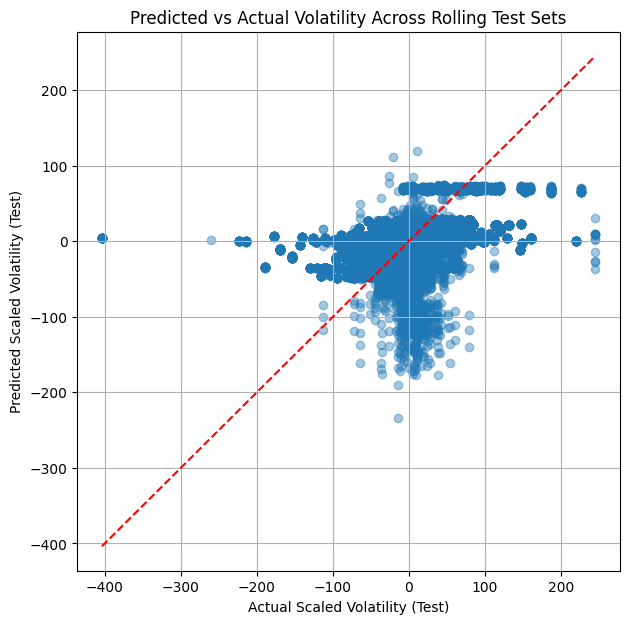

In [13]:
plt.figure(figsize=(7, 7))
plt.scatter(all_y_test, all_y_pred, alpha=0.4)
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'r--')
plt.xlabel('Actual Scaled Volatility (Test)')
plt.ylabel('Predicted Scaled Volatility (Test)')
plt.title('Predicted vs Actual Volatility Across Rolling Test Sets')
plt.grid(True)
plt.show()


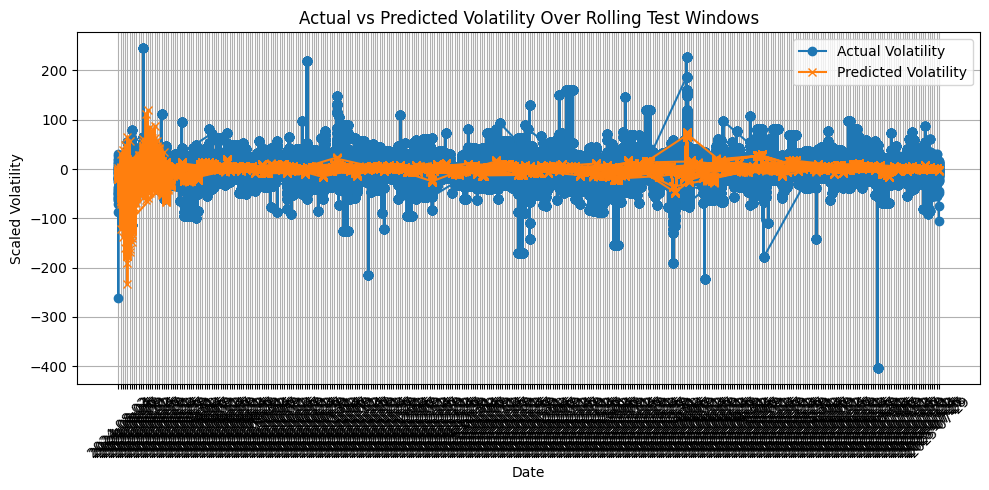

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(all_test_dates, all_y_test, label='Actual Volatility', marker='o')
plt.plot(all_test_dates, all_y_pred, label='Predicted Volatility', marker='x')
plt.xlabel('Date')
plt.ylabel('Scaled Volatility')
plt.title('Actual vs Predicted Volatility Over Rolling Test Windows')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Using a dynamic temporal fitting model on daily volatility produces slightly better results, though far from ideal. Daily spikes also seem negligible. We explore the coefficients in the next part of linear regression.